# Figure 1
<img src="files/img/fig1.png",width=400>
Waveform shape of M1 beta oscillation changes in PD. A, Estimation of beta oscillatory extrema. Row 1, a raw voltage signal; Row 2, the raw voltage is bandpass-filtered in the beta
frequency range to identify rising phases (yellow dots) and falling phases (green dots); Row 3, in between each rise and decay, peaks (purple circles) and troughs (teal circles) are identified in the raw
voltage signal.B, Sharpness of each extrema is calculated as shown by the formulas on the right. The extrema sharpness is the average difference between the voltage at the extrema and the voltage
at 5 ms before and after the extrema. These time points are indicated by teal vertical lines around the trough and purple vertical lines around the peak. The voltage +/-5ms around the trough is around the same as the trough voltage
(blue triangles and circle), and the voltage +/-5 ms around the peak changes relatively more
(purple triangles, relative to purple circle). C, D, Distributions of peak and trough sharpness
across a 30 s recording for a PD patient (C) before DBS and (D) during DBS. E, The sharpness ratio
(between peak sharpness and trough sharpness) is decreased by DBS. F, Clinical rigidity scores
are positively correlated with sharpness ratio in PD patients before DBS. E, F, Each dot indicates
1 patient. * p < 0.05.

**Imports**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
import pac
import util

**Load data**

In [3]:
ecog = util.loadPD()
Fs, t, S, Sdy, flo, fhi = util.loadmeta()

**Compute features of waveform shape**

In [4]:
widthS = 5 # hyperparameter for calculating sharpness

pks, trs, pksharp, trsharp, esrs, \
peaktotrough, risteep, desteep, rdsrs, \
risetodecay = util.measure_shape(ecog, widthS=widthS)

# A
### Locating oscillatory extrema

In [5]:
# Select one recording
group = 'B'
subj = 0
x = ecog[group][subj]

# Bandpass filter in beta frequency range
w = 3
xbeta = util.firf(x, flo, Fs, w = w, rmvedge=False)

# Determine rising and falling zerocrossings.
pos = xbeta > 0
zerorises = (pos[:-1] & ~pos[1:]).nonzero()[0]
pos = xbeta < 0
zerofalls = (pos[:-1] & ~pos[1:]).nonzero()[0]

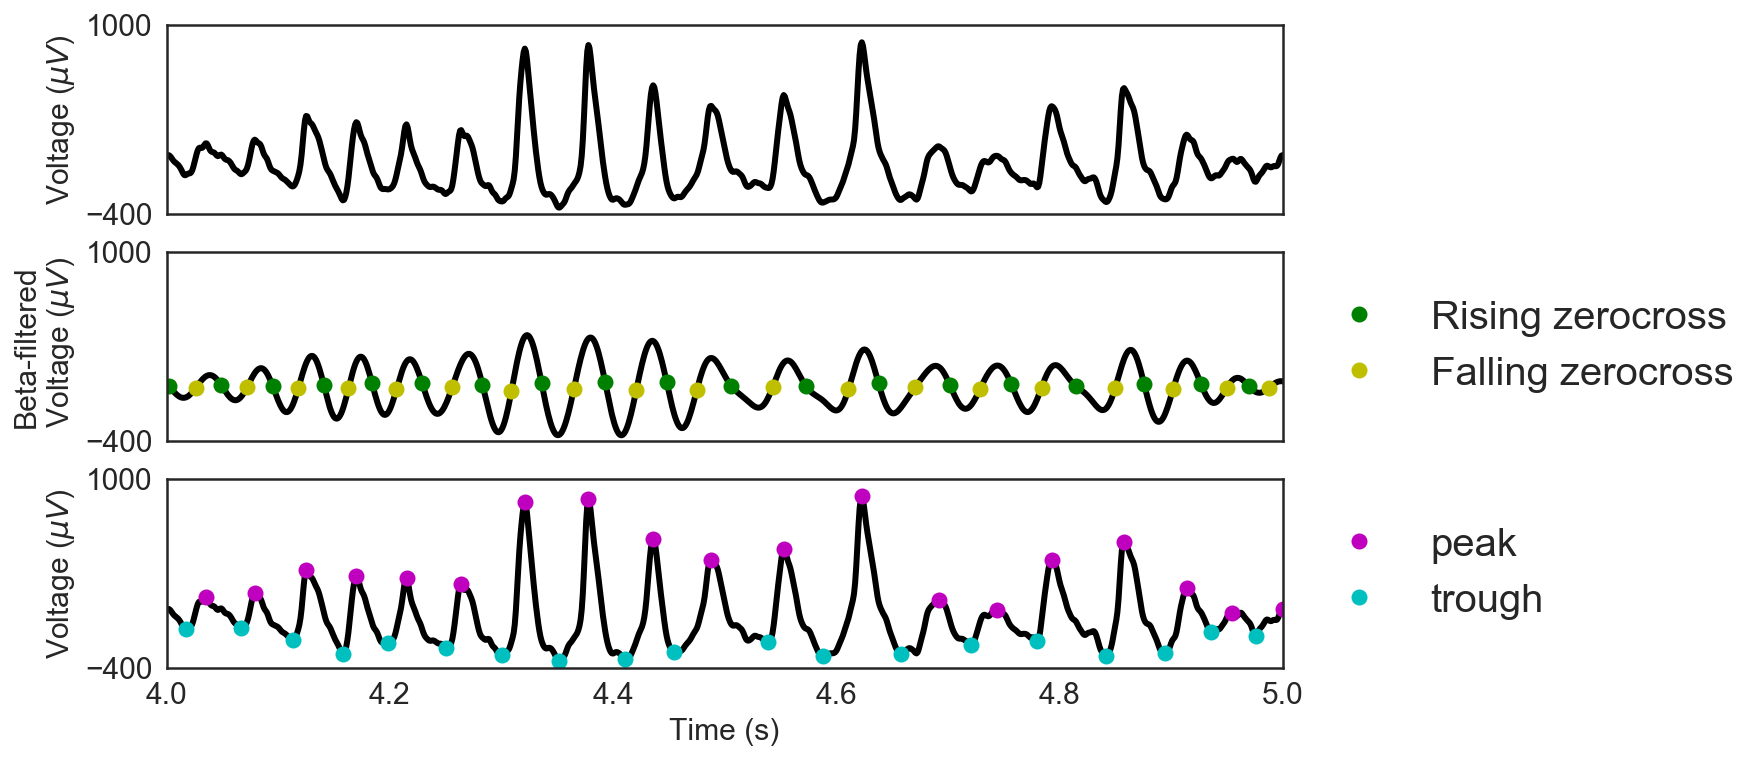

In [6]:
xlim = (4,5)
xlim2 = (4.83,4.88)
ylim = (-400,1000)
pkidx = 104
tridx = 103

fig = plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
plt.plot(t, x,'k',linewidth=3)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,2)
plt.plot(t, xbeta, 'k',linewidth=3)
plt.plot(t[zerorises], xbeta[zerorises], 'go', ms=8,label='Rising zerocross')
plt.plot(t[zerofalls], xbeta[zerofalls], 'yo', ms=8,label='Falling zerocross')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Beta-filtered\n Voltage ($\mu V$)',size=15)
plt.xlim(xlim)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,3)
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim)
plt.xlabel('Time (s)',size=15)
plt.tick_params(labelsize=15)

# B
### Estimating extrema sharpness

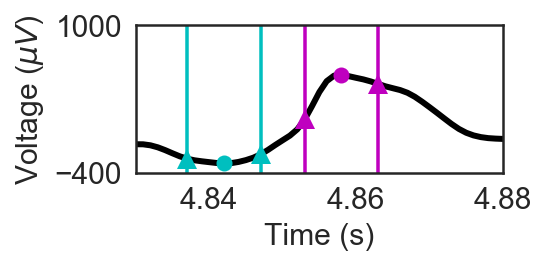

In [7]:
plt.figure(figsize=(4,2))
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.plot([t[pks[group][subj][pkidx]]-widthS/Fs,t[pks[group][subj][pkidx]]-widthS/Fs],[-1000,1000],'m-')
plt.plot([t[pks[group][subj][pkidx]]+widthS/Fs,t[pks[group][subj][pkidx]]+widthS/Fs],[-1000,1000],'m-')
plt.plot([t[trs[group][subj][tridx]]-widthS/Fs,t[trs[group][subj][tridx]]-widthS/Fs],[-1000,1000],'c-')
plt.plot([t[trs[group][subj][tridx]]+widthS/Fs,t[trs[group][subj][tridx]]+widthS/Fs],[-1000,1000],'c-')
plt.plot(t[pks[group][subj][pkidx]-widthS],x[pks[group][subj][pkidx]-widthS],'m^',ms=10)
plt.plot(t[pks[group][subj][pkidx]+widthS],x[pks[group][subj][pkidx]+widthS],'m^',ms=10)
plt.plot(t[trs[group][subj][tridx]-widthS],x[trs[group][subj][tridx]-widthS],'c^',ms=10)
plt.plot(t[trs[group][subj][tridx]+widthS],x[trs[group][subj][tridx]+widthS],'c^',ms=10)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim2)
plt.tick_params(labelsize=15)
plt.xlabel('Time (s)',size=15)

plt.tight_layout()

In [8]:
print(round(x[pks[group][subj][pkidx]]))
print(round(x[pks[group][subj][pkidx]-widthS]))
print(round(x[pks[group][subj][pkidx]+widthS]))
print(round(pksharp[group][subj][pkidx]))

print(round(x[trs[group][subj][tridx]]))
print(round(x[trs[group][subj][tridx]-widthS]))
print(round(x[trs[group][subj][tridx]+widthS]))
print(round(trsharp[group][subj][tridx]))

531.0
106.0
444.0
256.0
-313.0
-268.0
-226.0
66.0


In [9]:
import imp
imp.reload(util)

<module 'util' from '/gh/bv/pdexp/Cole_etal_2017_JNeuro/util.py'>

# C
### Sharpness in 1 subject before DBS

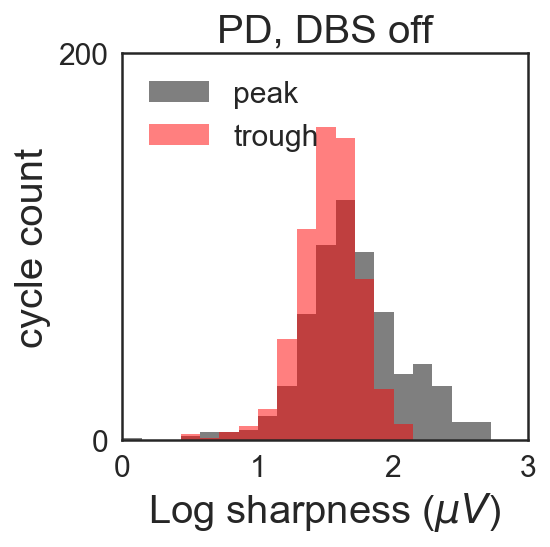

In [10]:
s = 0

Nbins = 20
bins=np.linspace(0,np.max(np.hstack((np.log10(pksharp['B'][s]),np.log10(trsharp['B'][s])))),Nbins)

plt.figure(figsize=(4,4))
plt.hist(np.log10(pksharp['B'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(trsharp['B'][s]),bins,color='r',alpha=0.5,label='trough')
plt.title('PD, DBS off',size=20)
plt.ylabel('cycle count',size=20)
plt.xlabel('Log sharpness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,3))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,200))
plt.tight_layout()

# D
### Sharpness in 1 subject during DBS

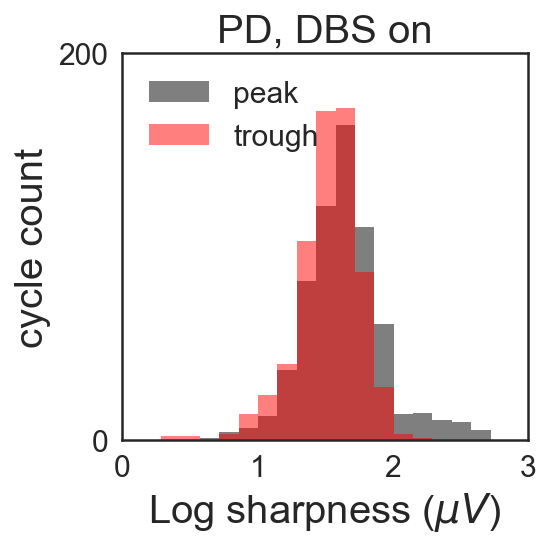

In [11]:
plt.figure(figsize=(4,4))
plt.hist(np.log10(pksharp['D'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(trsharp['D'][s]),bins,color='r',alpha=0.5,label='trough')
plt.ylabel('cycle count',size=20)
plt.title('PD, DBS on',size=20)
plt.xlabel('Log sharpness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,3))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,200))
plt.tight_layout()

# E
### Sharpness ratio change with DBS

Ttest_relResult(statistic=2.5221427156209533, pvalue=0.019404160033567163)


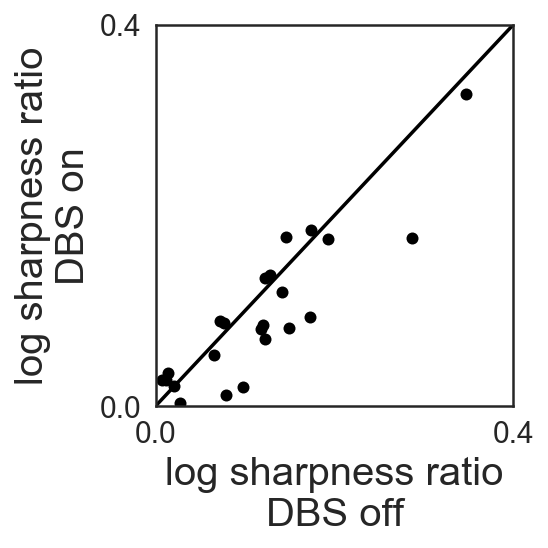

In [12]:
from plt import scatt_2cond
scatt_2cond(esrs['B'],esrs['D'],ms=12,
           lims = (0,.4), xlabel = 'log sharpness ratio\nDBS off',
            ylabel = 'log sharpness ratio\nDBS on',figsize=(4,4))
print(sp.stats.ttest_rel(esrs['B'],esrs['D']))

# F
### Sharpness ratio relationship to rigidity before DBS

SpearmanrResult(correlation=0.53872239614707129, pvalue=0.014254305978139269)


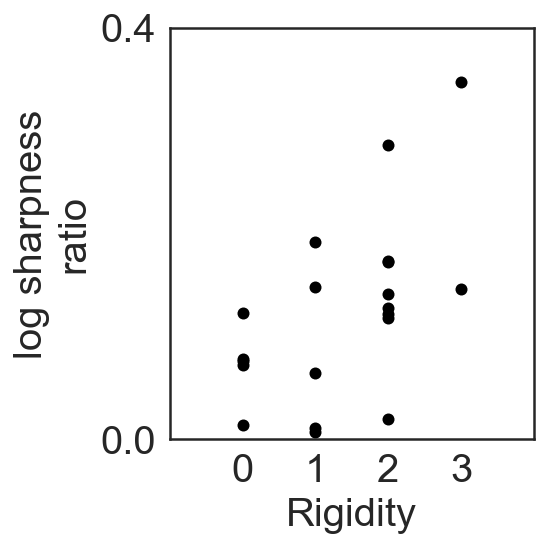

In [13]:
# Load rigidity
rigidB, rigidD = util.measure_rigid()

# Remove subjects without rigid rating
if np.any(rigidB==99):
    rigidB2 = rigidB[rigidB!=99]
    esr_rigid = esrs['B'][rigidB!=99]
    
# Plot rigidity and sharpness ratio
from plt import scatt_corr
scatt_corr(rigidB2,esr_rigid, ms = 12,
            xlim = [-1,4], ylim = [0,.4],
            xticks = range(4), yticks = None,
            xlabel = 'Rigidity', ylabel = 'log sharpness\nratio',
            showrp = False, figsize=(4,4))
print(sp.stats.spearmanr(rigidB2,esr_rigid))

# Other Statistics

### changes in rigidity score and sharpness ratio do not correlate with each other (Spearman r=0.17; n=23; p=0.48)

In [14]:
# Remove subjects with missing rigidity scores
if np.any(rigidB==99):
    rigidD2 = rigidD[rigidB!=99]
    esr_rigidD = esrs['D'][rigidB!=99]

print(sp.stats.spearmanr(rigidB2-rigidD2,esr_rigid-esr_rigidD))

SpearmanrResult(correlation=0.16858544608470494, pvalue=0.47739280688139618)


### the average sharpness of peaks and troughs decreases with DBS application (paired t test, t(45)=2.4, p=0.027).

In [15]:
esharp = util._blankecog(dtype=float)
for s in range(S):
    esharp['B'][s] = np.log10(np.max((np.mean(pksharp['B'][s]),np.mean(trsharp['B'][s]))))
    esharp['D'][s] = np.log10(np.max((np.mean(pksharp['D'][s]),np.mean(trsharp['D'][s]))))
    esharp['A'][s] = np.log10(np.max((np.mean(pksharp['A'][s]),np.mean(trsharp['A'][s]))))
for s in range(Sdy):
    esharp['DY'][s] = np.log10(np.max((np.mean(pksharp['DY'][s]),np.mean(trsharp['DY'][s]))))
    
print(sp.stats.ttest_rel(esharp['B'],esharp['D']))

Ttest_relResult(statistic=2.3670705737600577, pvalue=0.027146974167243518)


### extrema sharpness itself does not correlate with the clinical rigidity score (Spearman correlation; r=0.17; n=23; p=0.49)

In [16]:
if np.any(rigidB==99):
    esharpB_rigid = esharp['B'][rigidB!=99]
print(sp.stats.spearmanr(rigidB2,esharpB_rigid))

SpearmanrResult(correlation=-0.16509234720636057, pvalue=0.48669692712837842)
